In [1]:
import numpy as np
import pandas as pd
!pip install chardet
import chardet
import matplotlib.pyplot as plt

In [3]:
with open('/content/spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [5]:
df = pd.read_csv('/content/spam.csv', encoding=encoding)

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.rename({'v1':'target','v2':'text'},axis=1,inplace=True)

In [10]:
df['target']=df['target'].map({'ham':0,'spam':1})

In [11]:
#checking for duplicate values
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


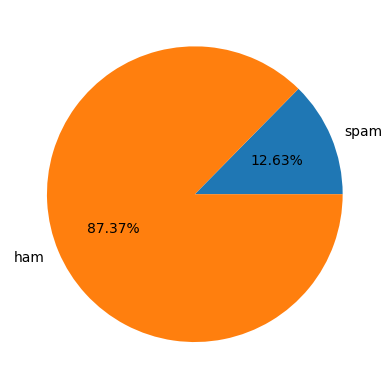

In [14]:
y=[df['target'].sum(),df.shape[0]-df['target'].sum()]
plt.pie(y,labels=['spam','ham'],autopct='%1.2f%%')
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
df['num_char']=df['text'].apply(len)

In [18]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df[df.target==0][['num_char','num_word','num_sen']].describe()

,num_char,num_word,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#for spam
df[df.target==1][['num_char','num_word','num_sen']].describe()
#mean is more for spam messages

,num_char,num_word,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

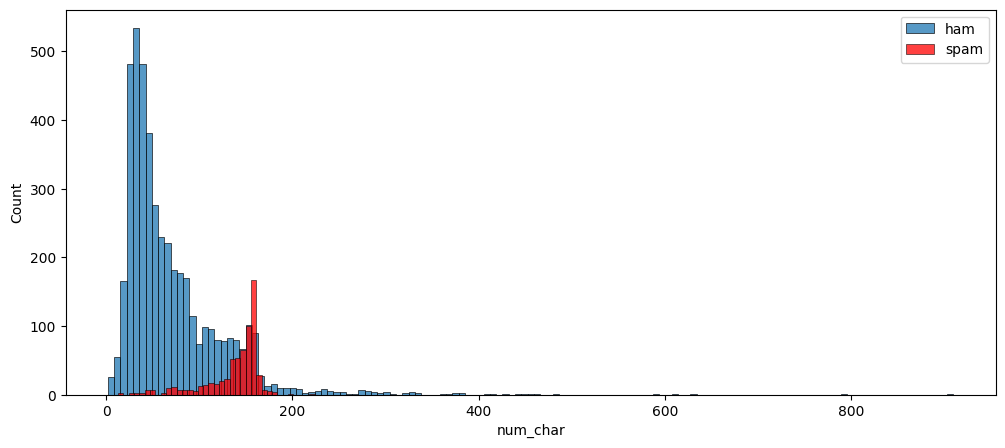

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(df[df.target==0]['num_char'],label='ham')
sns.histplot(df[df.target==1]['num_char'],color='red',label='spam')
plt.legend()
plt.show()

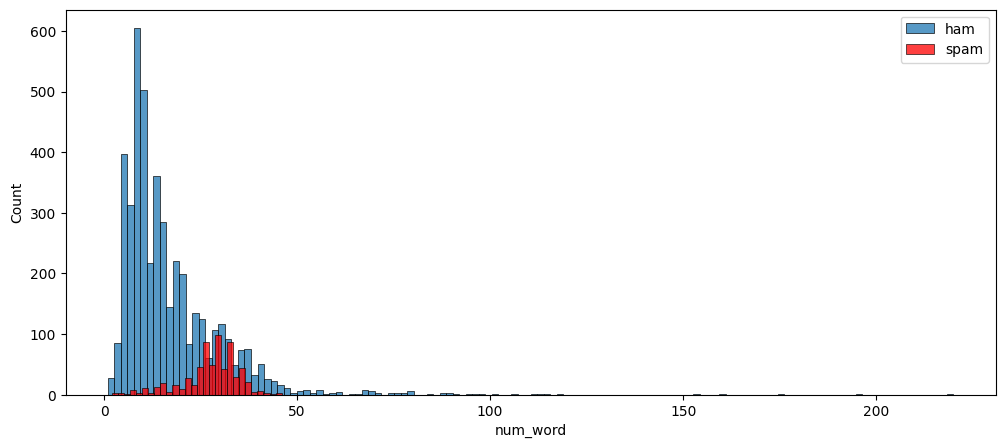

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(df[df.target==0]['num_word'],label='ham')
sns.histplot(df[df.target==1]['num_word'],color='red',label='spam')
plt.legend()
plt.show()

<Axes: >

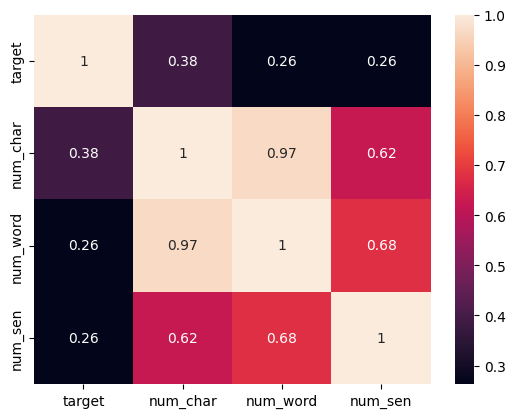

In [25]:
sns.heatmap(df.select_dtypes(include='int').corr(),annot=True)

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text.clear()
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text.append(i)

    y.clear()
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [28]:
df['transformed_text']=df['text'].apply(transform_text)

In [29]:
df.head()

,target,text,num_char,num_word,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

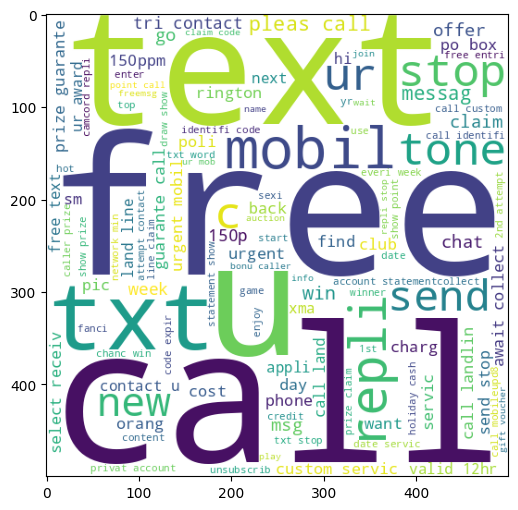

In [31]:
spam_wc=wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

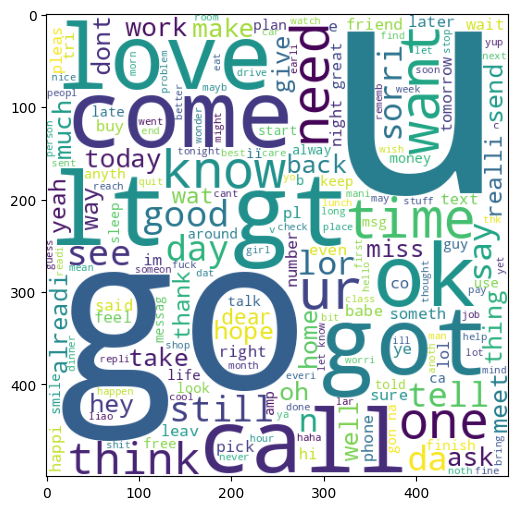

In [32]:
ham_wc=wc.generate(df[df.target==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

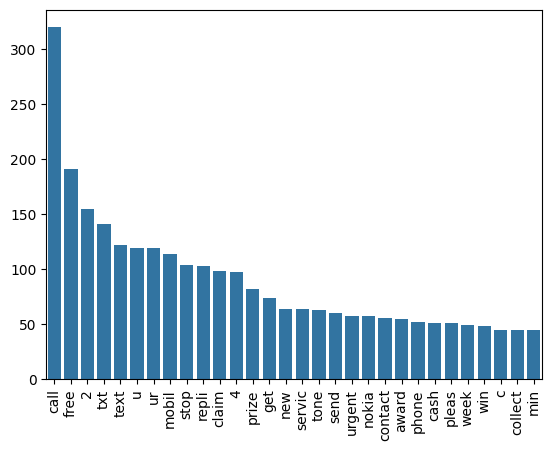

In [33]:
#most ocurring words in spam
y={}
for msg in df[df.target==1].transformed_text.tolist():
    for word in msg.split():
        y[word]=y.get(word,0)+1

sorted_y=sorted(y.items(),key=lambda x:x[1],reverse=True)
top_words = [item[0] for item in sorted_y[:30]]
word_counts = [item[1] for item in sorted_y[:30]]
sns.barplot(x=top_words,y=word_counts)
plt.xticks(rotation='vertical')
plt.show()

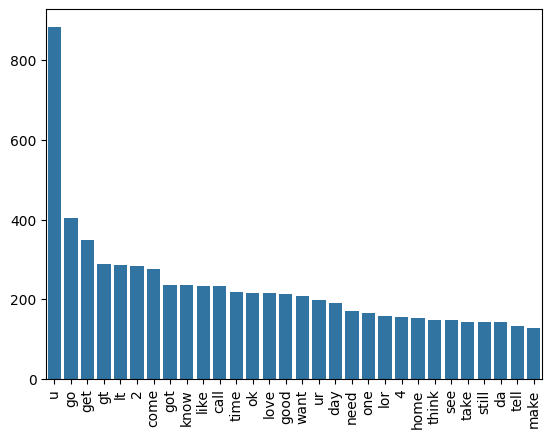

In [34]:
#most ocurring words in spam
y={}
for msg in df[df.target==0].transformed_text.tolist():
    for word in msg.split():
        y[word]=y.get(word,0)+1

sorted_y=sorted(y.items(),key=lambda x:x[1],reverse=True)
top_words = [item[0] for item in sorted_y[:30]]
word_counts = [item[1] for item in sorted_y[:30]]
sns.barplot(x=top_words,y=word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()  #bag of words
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
#X=cv.fit_transform(df['transformed_text']).toarray()   #returns a sparse matrix
tfidf.fit(df['transformed_text'])
X=tfidf.transform(df['transformed_text']).toarray()

In [37]:
y=df['target']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [40]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [41]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [42]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [43]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [45]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [46]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [47]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [49]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [50]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Precision',ascending=False)

In [51]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,MNB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [52]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier